# Part 1 Model a Deep Feed Forward Network for Regression

## 1.Generating Training Data

In [16]:
import numpy as np
import random as rnd
import pandas as pd

#define 9 dimensional x (input) numpy array
x = np.zeros(9, np.float64)

#define 5 dimensional y (output) numpy array
y = np.zeros(5, np.float64)

#define y functions
# y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
# y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (2 * x[6] * x[7]) + 1
# y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
# y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
# y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (x[0] ** 2 * x[6]) - 1

fh = open("training_data.txt","w")


#generate random inputs for every iteration
def generate_random_x():
    for index, x_i in enumerate(x):
        #x[index] = rnd.uniform(0, 100)
        x[index] = rnd.random()
        # x[index] = rnd.randint(0, 10000)
        
def calculate_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh.write(str(x_i))
        fh.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        # some noise added.
        y[y_i] += y[y_i] * 0.001
        fh.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh.write(" ")

    # fh.write(' y' + str(index))
    fh.write("\n")

#generate 600 training samples.
for i in range(0, 120, 1):

    for j in range(0, 5, 1):
        calculate_y()

fh.close()

column_names = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'y0', 'y1', 'y2', 'y3', 'y4']

df = pd.read_csv("training_data.txt", header=None, delimiter=' ')

df.columns = column_names

df.head()






,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.949688,0.775597,0.913830,0.013655,0.560499,0.360725,0.943691,0.833470,0.484945,-3.641941,-0.641199,-1.824330,-6.095105,-0.794640
1,0.045952,0.027912,0.061524,0.763515,0.304402,0.387798,0.660480,0.216121,0.160511,0.672789,0.681849,-2.240863,-0.620841,-2.184313
2,0.247389,0.477492,0.179739,0.722179,0.864501,0.384944,0.435235,0.607522,0.549980,1.831997,0.664697,-2.806331,-2.496279,-2.345635
3,0.060205,0.668670,0.793216,0.888407,0.549063,0.686823,0.242603,0.949293,0.024834,1.152319,0.949221,-1.641698,-3.124831,-4.091910
4,0.003561,0.827269,0.506180,0.293190,0.998661,0.913623,0.141839,0.339410,0.718997,2.163284,0.875125,-1.890218,-0.743369,-3.590184


## 2.Generating Test Data

In [17]:

fh_test = open("test_data.txt", "w")

def calculate_test_y():
    generate_random_x()
    # y1 = 2*x1 * x2 * x3 + x4 * x5 - 3*x6 * x7 * x8 - 7*x1^2 * x8 + 2*x5
    # if index == 0:
    y[0] = (2 * x[0] * x[1] * x[2]) + (x[3] * x[4]) - (3 * x[5] * x[6] * x[7]) - (7 * x[0] ** 2 * x[7]) + (2 * x[4])
    # elif index == 1:
    y[1] = (2 * x[0] * x[4] * x[5]) - (x[2] * x[3] - 3 * x[1] * x[2] * x[3]) - x[2] ** 2 * x[4] - (
            2 * x[6] * x[7]) + 1
    # elif index == 2:
    y[2] = (x[2] ** 2) - (x[4] * x[6]) - (3 * x[0] * x[3] * x[5]) - (12 * x[0] ** 2 * x[1] * x[3]) - 2
    # elif index == 3:
    y[3] = (x[5] ** 3) - (5 * x[0] * x[2] * x[7]) - (x[0] * x[3] * x[6]) - (2 * x[4] ** 2 * x[1] * x[3]) - 3 * x[7]
    # elif index == 4:
    y[4] = (x[2] ** 2 * x[4]) - (2 * x[2] * x[3] * x[7]) - (x[0] * x[1] * x[3]) - (3 * x[5]) + (
            x[0] ** 2 * x[6]) - 1

    # write x to file
    for x_i in x:
        fh_test.write(str(x_i))
        fh_test.write(" ")

    # write y to file
    for y_i in range(0, 5, 1):
        # if index == y_i:
        fh_test.write(str(y[y_i]))
        # else:
        #    fh.write("0")

        if y_i != 4:
            fh_test.write(" ")

    # fh.write(' y' + str(index))
    fh_test.write("\n")
    
#generate 100 test samples.    
for i in range(0, 20, 1):
    for j in range(0, 5, 1):
        calculate_test_y()

fh_test.close()
    
df_test = pd.read_csv("test_data.txt", header=None, delimiter=' ')

df_test.columns = column_names

df_test.head()



,x0,x1,x2,x3,x4,x5,x6,x7,x8,y0,y1,y2,y3,y4
0,0.245240,0.665468,0.852349,0.419237,0.006081,0.390344,0.015568,0.802645,0.239940,-0.059627,1.327806,-1.595342,-3.188963,-2.807725
1,0.866565,0.477839,0.047084,0.550067,0.546208,0.828741,0.449013,0.105061,0.668783,0.762321,1.700198,-5.796687,-0.138291,-3.381047
2,0.289119,0.617810,0.069320,0.502118,0.913223,0.067608,0.907567,0.977245,0.437590,1.558051,-0.712813,-3.164619,-3.678529,-1.280291
3,0.205031,0.769512,0.967749,0.973120,0.862486,0.759072,0.583365,0.250493,0.311933,2.463166,1.400750,-2.398705,-1.793095,-3.070272
4,0.390535,0.413843,0.181294,0.827234,0.425575,0.614009,0.637540,0.689055,0.481282,-0.283054,0.347733,-3.460110,-2.409584,-3.071181


## 3. Loading Training and Test Datasets

In [10]:
#load training dataset
training_dataset = np.loadtxt("training_data.txt", delimiter=' ')

X_Train = training_dataset[:, 0:9]
Y_Train = training_dataset[:, 9:14]

#load test dataset
test_dataset = np.loadtxt("test_data.txt", delimiter=' ')

X_Test = test_dataset[:, 0:9]
Y_Test = test_dataset[:, 9:14]

## 4. Creating Model
We have 9 inputs and 5 outputs.

In [12]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.layers.core import Dense, Activation

#set different parameters here.
def generate_and_train_model(X_Train,Y_Train,X_Test,Y_Test,activation,hidden_1,hidden_2,hidden_3,learning_rate,epoch_size):

    model = Sequential()
    model.add(Dense(9, input_dim=9))
    model.add(Activation(activation))
    model.add(Dense(hidden_1))
    model.add(Activation(activation))
    model.add(Dense(hidden_2))
    model.add(Activation(activation))
    model.add(Dense(hidden_3))
    model.add(Activation(activation))
    model.add(Dense(5))
    model.add(Activation('linear'))

    model.summary()

    sgd = optimizers.SGD(lr=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    model.fit(X_Train, Y_Train, epochs=epoch_size, verbose=0)

    training_scores = model.evaluate(X_Train, Y_Train)

    test_scores = model.evaluate(X_Test, Y_Test)

    print("Epoch_size: " + str(epoch_size))
    print("Learning Rate: " + str(learning_rate))
    print("Activation " + str(activation))
    print("Hidden_1 " + str(hidden_1))
    print("Hidden_2 " + str(hidden_2))
    print("Hidden_3 " + str(hidden_3))

    print("Train Loss: %f" % training_scores)
    print("Test Loss: %f " % test_scores)
    
    
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.01, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 4, 4, 4, 0.5, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.01, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "relu", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.1, 1500)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.01, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "sigmoid", 4, 4, 4, 0.2, 1500)





100/100 [==============================] - 0s 88us/step
Epoch_size: 1000
Learning Rate: 0.01
Activation tanh
Hidden_1 4
Hidden_2 4
Hidden_3 4
Train Loss: 0.246952
Test Loss: 0.236486 


| Data Size | Input Node | Input Act | Dense-1 | Dense-1 Act | Dense-2 | Dense-2 Act | Dense-3 | Dense-3 Act | Output Node | Output Act | L.Rate | Epoch | Train Error | Test Error |
|:---------:|:----------:|:---------:|:-------:|:-----------:|:-------:|:-----------:|:-------:|:-----------:|:-----------:|:----------:|:------:|:-----:|:-----------:|:----------:|
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.242384  |  0.296860  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.126778  |  0.167803  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.217331  |  0.260438  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1000 |   0.218391  |  0.280169  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  1500 |   0.190859  |  0.242867  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.1  |  2000 |   0.179826  |  0.242151  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1000 |   0.410062  |  0.473462  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  1500 |   0.569335  |  0.677881  |
|    600    |      9     |    tanh   |    4    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |   0.5  |  2000 |   0.345615  |  0.403062  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1000 |   1.822732  |  2.347571  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  1500 |   0.805988  |  0.992025  |
|    600    |      9     |    relu   |    4    |     relu    |    4    |     relu    |    4    |     relu    |      5      |   linear   |  0.01  |  2000 |   0.462038  |  0.488292  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.283931  |  0.325317  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  1500 |   0.397254  |  0.421426  |
|    600    |      9     |    relu   |    4    |     tanh    |    4    |     relu    |    4    |     tanh    |      5      |   linear   |  0.01  |  2000 |   0.230768  |  0.269217  |
|    600    |      9     |    tanh   |    6    |     tanh    |    4    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.230664  |  0.284872  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    4    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.107739  |  0.147939  |
|    600    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.106117  |  0.138951  |
|    625    |      9     |    tanh   |    6    |     tanh    |    6    |     tanh    |    6    |     tanh    |      5      |   linear   |  0.01  |  1000 |   0.100039  |  0.105181  |

## Adding New Nodes to Hidden Layers

In [18]:
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 4, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 6, 4, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 6, 6, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 6, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 8, 6, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 8, 8, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 8, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 10, 8, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 10, 10, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 10, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 12, 10, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 12, 12, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 12, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 14, 12, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 14, 14, 14, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 16, 14, 14, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 16, 16, 16, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 18, 16, 16, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 18, 18, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 18, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 20, 18, 0.1, 1000)
generate_and_train_model(X_Train, Y_Train, X_Test, Y_Test, "tanh", 20, 20, 20, 0.1, 1000)










100/100 [==============================] - 0s 28us/step
Epoch_size: 1000
Learning Rate: 0.1
Activation tanh
Hidden_1 6
Hidden_2 4
Hidden_3 4
Train Loss: 0.179570
Test Loss: 0.215564 


KeyboardInterrupt: 

# Part 2 Digit Recognition using CNNs

## 1. Loading Data

5


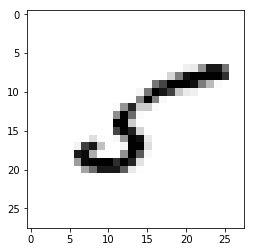

In [3]:
import tensorflow as tf
import numpy as np

mnist_digits = tf.keras.datasets.mnist


#mnist_digits.load_data()


(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()

import matplotlib.pyplot as plt
%matplotlib inline 
# Only use this if using iPython
image_index = 11 
# You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


## Loading AlexNET

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, Flatten, Dropout
from tensorflow.python.keras.layers.core import Dense, Activation
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers
from tensorflow.keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = mnist_digits.load_data()
img_shape = (28,28)



#print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

x_train = np.expand_dims(x_train,3)
print(x_train.shape)

y_train = np.expand_dims(y_train,3)
print(y_train[0].shape)

#x_train = np.swapaxes(x_train,1,3)
#print(x_train[0].shape)


l2_reg = 0
n_classes=10

alexnet = Sequential()

alexnet.add(Conv2D(96, (7, 7), input_shape=(28,28,1),
                       padding='same', kernel_regularizer=l2(l2_reg)))

alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
# Layer 5
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(3072))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(n_classes))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

alexnet.summary()

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

#validation_split=0.2, shuffle=True
alexnet.fit(x_train,y_train, batch_size=64, epochs=1, verbose=2, validation_split=0.2, shuffle=True)